<div align="center"; font-size: 60px;>
Using data to improve MLB attendance
</div>

# Dataset:  

The dataset is imported and stored in dataframe by the name dodgers, required libraries are also imported.  
The below dataframe has a total of 81 rows and 12 columns.  
The column attend is the number of people who attended on any given day.  
All the other columns are variables and they are self descriptive.  
The columns cap/shirt/fireworks/bobblehead refers whether freebies has been distributed on that day or not.  
The column opponent indicates the opponent team name.  


In [1]:
import pandas as pd

dodgers = pd.read_csv(r"C:\Users\Riaz\Desktop\MSDS\Predictive Analysis\Week 3\dodgers-2022.csv")
pd.set_option('display.max_columns', None)
dodgers




,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...,...
76,SEP,29,40724,Saturday,Rockies,84,Cloudy,Night,NO,NO,NO,NO
77,SEP,30,35607,Sunday,Rockies,95,Clear,Day,NO,NO,NO,NO
78,OCT,1,33624,Monday,Giants,86,Clear,Night,NO,NO,NO,NO
79,OCT,2,42473,Tuesday,Giants,83,Clear,Night,NO,NO,NO,NO


# Objective:  

Recommendation to Los Angeles Dodgers Major League Baseball management on how to improve attendance.  


# Approach:  

The analysis is based on the attend column and trying to find which other variable influence these numbers.  
Primarily, EDA has been done as the dataset has very low number of records.  


As seen from the below bar chart, it is a bad idea to have any game on Thursday.  
Rest all of the days in the week are equally good.  

Text(0, 0.5, 'Sum of attendees')

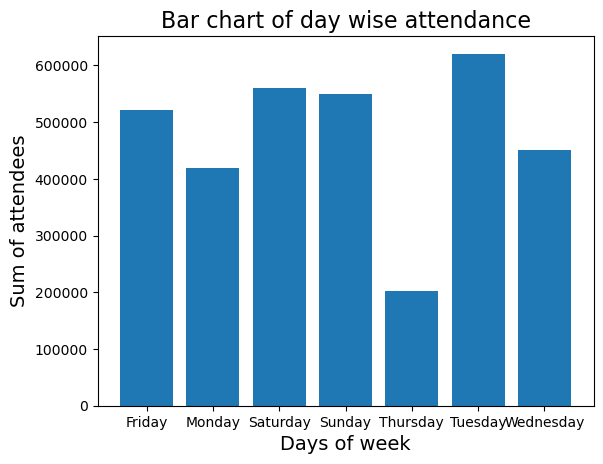

In [2]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dodgers.groupby('day_of_week').sum()['attend']

plt.bar(dodgers.groupby('day_of_week').sum()['attend'].index,dodgers.groupby('day_of_week').sum()['attend'].values)

plt.title('Bar chart of day wise attendance', fontsize=16)
plt.xticks(['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
plt.xlabel('Days of week', fontsize=14)
plt.ylabel('Sum of attendees', fontsize=14)

As seen from the below bar chart, the chance of more attendance happens on a clear day.  
Matches should be avoided on cloudy days, as the number of people turning in would be very less.  

Text(0, 0.5, 'Sum of attendees')

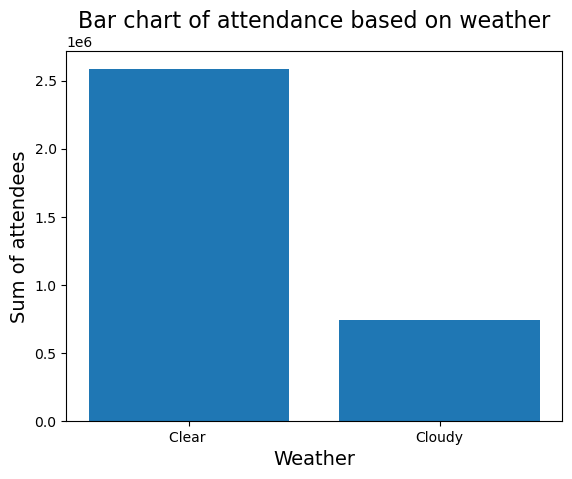

In [3]:
plt.bar(dodgers.groupby('skies').sum()['attend'].index,dodgers.groupby('skies').sum()['attend'].values)
plt.title('Bar chart of attendance based on weather', fontsize=16)
plt.xlabel('Weather', fontsize=14)
plt.ylabel('Sum of attendees', fontsize=14)

As seen from the below scatter chart, the chance of more attendance happens when the temperature is inbetween 65F and 83F.  Anything above or below the attendance reduces.  

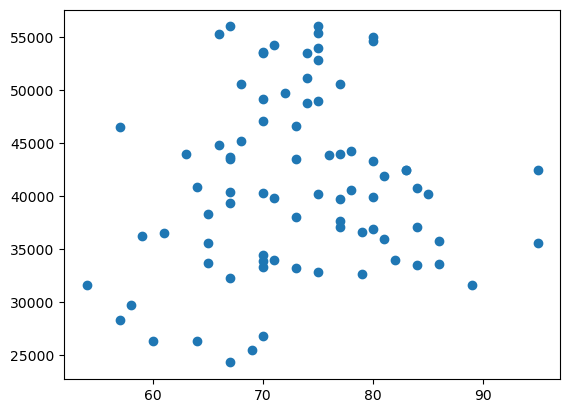

In [4]:
plt.scatter(dodgers['temp'],dodgers['attend'])

# Comparison of Anova test between the categorical/attendance variable and the EDA

A test has been conducted to find if the mean of attendance for different opponents are same or different and if it is statistically significant.  

The scipy.stats.f_oneway Anova test is performed to determine if there is a difference in the mean of different groups and whether it is statistically significant.  This test has been chosen, as we are using numerical and categorical variable.

To perform this test, the dependent variable which is numerical should follow normal distribution.  To check that, histogram has been plotted and it has been found to be following normal distribution.  

As seen from the result below, p value is 0.18 which is more than 0.05.  Hence, we fail to reject the Null hypothesis.  

In this case, 

Null Hypothesis (H₀): The means of all the different groups of opponents are equal.  
Alternative Hypothesis (H₁): At least one group mean is different from the others.  

It does not prove that the number of attendees are defined by the opponents.  

However, if the bar charts are plotted, we can see that the attendees are more when the opponents like Cardinals, Giants, Padres, Rockies and Snakes are present.  

The reason why ANOVA says otherwise may be due to the less observations we have.  




Text(0, 0.5, 'Frequency in days')

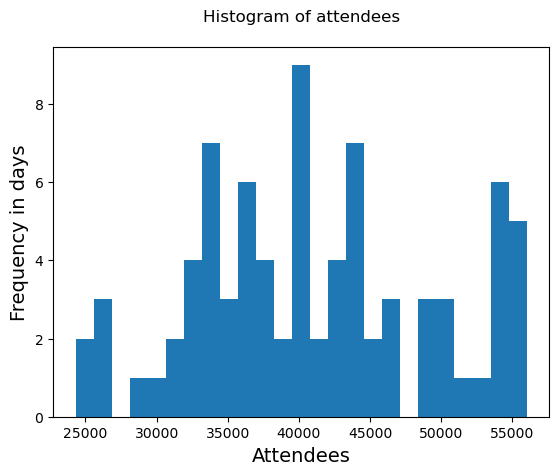

In [5]:
plt.title("Histogram of attendees\n")
plt.hist(dodgers['attend'], bins=25)
plt.xlabel('Attendees', fontsize=14)
plt.ylabel('Frequency in days', fontsize=14)

In [6]:


import scipy.stats as stats

# Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(dodgers[dodgers['opponent'] == 'Pirates']['attend'],
                              dodgers[dodgers['opponent'] == 'Padres']['attend'],
                                 dodgers[dodgers['opponent'] == 'Braves']['attend'],
                                 dodgers[dodgers['opponent'] == 'Nationals']['attend'],
                                 dodgers[dodgers['opponent'] == 'Giants']['attend'],
                                 dodgers[dodgers['opponent'] == 'Rockies']['attend'],
                                 dodgers[dodgers['opponent'] == 'Snakes']['attend'],
                                 dodgers[dodgers['opponent'] == 'Cardinals']['attend'],
                                 dodgers[dodgers['opponent'] == 'Astros']['attend'],
                                 dodgers[dodgers['opponent'] == 'Brewers']['attend'],
                                 dodgers[dodgers['opponent'] == 'Angels']['attend'],
                                 dodgers[dodgers['opponent'] == 'White Sox']['attend'],
                                 dodgers[dodgers['opponent'] == 'Mets']['attend'],
                                 dodgers[dodgers['opponent'] == 'Reds']['attend'],
                                 dodgers[dodgers['opponent'] == 'Phillies']['attend'],
                                 dodgers[dodgers['opponent'] == 'Cubs']['attend'],
                              dodgers[dodgers['opponent'] == 'Marlins']['attend'])

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")




F-statistic: 1.3759848896865952
P-value: 0.18253553289949573


Text(0, 0.5, 'Number of attendees')

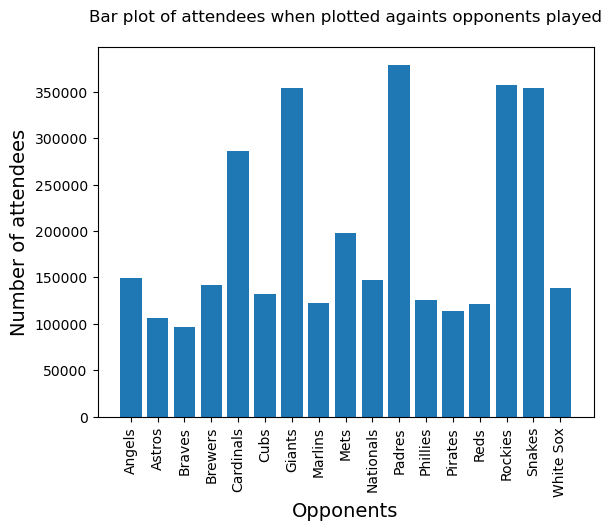

In [7]:
plt.bar(dodgers.groupby('opponent').sum()['attend'].index,dodgers.groupby('opponent').sum()['attend'].values)
plt.xticks(rotation=90)
plt.xlabel('Opponents', fontsize=14)
plt.title ("Bar plot of attendees when plotted againts opponents played\n")
plt.ylabel('Number of attendees', fontsize=14)

As seen from the below bar chart, fireworks does not influence attendance.  

Text(0, 0.5, 'Number of attendees')

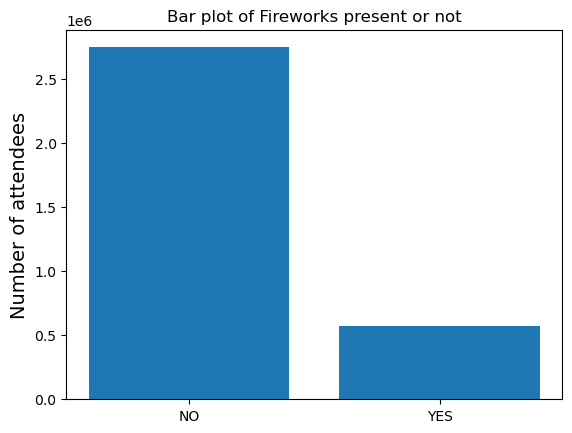

In [8]:
plt.bar(dodgers.groupby('fireworks').sum()['attend'].index,dodgers.groupby('fireworks').sum()['attend'].values)
plt.title ("Bar plot of Fireworks present or not")
plt.ylabel('Number of attendees', fontsize=14)

The comparison has been made between any days when freebies are given vs not given.  
All the different types of freebies like cap,shirt etc. are taken into account and it has been found that freebies are not influencing attendance.  

Text(0, 0.5, 'Number of attendees')

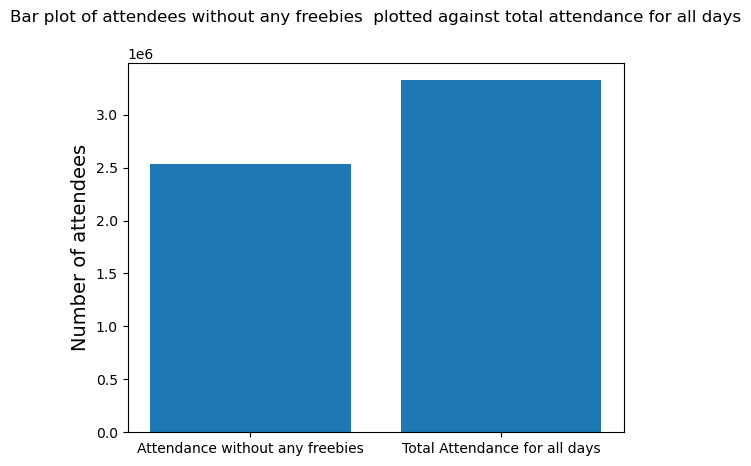

In [9]:
values=[dodgers[(dodgers['cap'] == 'NO')&(dodgers['shirt'] == 'NO')&(dodgers['fireworks'] == 'NO')&(dodgers['fireworks'] == 'NO')].sum()['attend'],dodgers['attend'].sum()]
xlabel=['Attendance without any freebies','Total Attendance for all days']
plt.bar(xlabel,values)
plt.title ("Bar plot of attendees without any freebies  plotted against total attendance for all days\n")
plt.ylabel('Number of attendees', fontsize=14)



# Conclusion

As seen from the above analysis, to improve attendance following needs to be done,

        All of the days in the week are equally good, except Thursday.    

        Conduct the game on a clear day.  

        The chance of more attendance happens when the temperature is inbetween 65F and 83F. Anything above or below the attendance reduces.  

        Attendance is more when the opponents like Cardinals, Giants, Padres, Rockies and Snakes are present.  

        Presence of fireworks or distribution of freebies does not increase the attendance.  